In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web

In [4]:
M = np.matrix([[1, 2, 0], [7.2, 5, 9], [-3, 100, 5.8], [1, -90, 9.7], [2, 88, 1.2]])
dim = M.shape
print('\n This is the '+ ' Matrix. \n' + '\n'+str(M))

## Question BABY PCA



 This is the  Matrix. 

[[  1.    2.    0. ]
 [  7.2   5.    9. ]
 [ -3.  100.    5.8]
 [  1.  -90.    9.7]
 [  2.   88.    1.2]]


In [5]:
def cov(M):

    M -= np.mean(M, axis = 0) 
    cov = np.cov(M.T, bias=False)
    print("Covariance matrix :\n")
    print(cov)

    V, comps = np.linalg.eig(cov)

    print('\nVariances of matrix \n')
    print(str(V.T) + '\n')
    
    return comps


comps = cov(M)

Covariance matrix :

[[ 1.33480e+01 -8.70500e+01  4.33800e+00]
 [-8.70500e+01  5.91700e+03 -1.70525e+02]
 [ 4.33800e+00 -1.70525e+02  1.95180e+01]]

Variances of matrix 

[5923.21143004   11.10961613   15.54495383]



In [6]:

print('The 1st PC')
print(comps[:,0])

print('\n\nThe 2nd PC ')
print(comps[:,1])

print('\n\nThe 3rd PC')
print(comps[:,2])

The 1st PC
[-0.01474307  0.99947415 -0.0288801 ]


The 2nd PC 
[ 8.85912206e-01 -3.35232594e-04 -4.63852834e-01]


The 3rd PC
[0.4636186  0.03242385 0.88544141]


In [7]:
print('\nPC matrix\n')
print(comps)


## Question 3

O = comps **(-1) * comps
print(O)
print(np.dot(comps, comps.T))


PC matrix

[[-1.47430660e-02  8.85912206e-01  4.63618599e-01]
 [ 9.99474153e-01 -3.35232594e-04  3.24238504e-02]
 [-2.88801049e-02 -4.63852834e-01  8.85441409e-01]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


 Orthogonal Matrix  : diagonals are one and rest of the values are approx zero 

[[ 1.00000000e+00  6.79959974e-17 -1.79810197e-15]
 [ 6.79959974e-17  1.00000000e+00  5.39466519e-17]
 [-1.79810197e-15  5.39466519e-17  1.00000000e+00]]


In [8]:
import numpy.matlib as npm

def newdata(M,comps):

    mean = np.mean(M,0)
    mat = npm.repmat(mean, dim[0], 1)
    Y = M - mat
    new = Y * comps
    print('\n New Data\n')
    print(new)
    return new

new = newdata(M,comps)


 New Data

[[ -18.8321296     1.82358917   -5.4639379 ]
 [ -16.18503509    3.14056365    5.47674164]
 [  79.00780501   -4.44325888    0.99468521]
 [-111.06388865   -2.64494192    0.14184953]
 [  67.07324833    2.12404797   -1.14933848]]


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import yfinance as yf

#x = standardizedData = StandardScaler().fit_transform(M)
def skPCA(M):
    pca = decomposition.PCA(n_components=3)
    res = pca.fit_transform(M)
    r = pca.explained_variance_ratio_
    print(r)
    return r,res

r,res = skPCA(M)

[0.99552014 0.00261266 0.0018672 ]


In [17]:
res

array([[ 18.8321296 ,  -5.4639379 ,  -1.82358917],
       [ 16.18503509,   5.47674164,  -3.14056365],
       [-79.00780501,   0.99468521,   4.44325888],
       [111.06388865,   0.14184953,   2.64494192],
       [-67.07324833,  -1.14933848,  -2.12404797]])

In [18]:
pca.components_[0]

array([ 0.01474307, -0.99947415,  0.0288801 ])

In [19]:
pca.components_[1]

array([0.4636186 , 0.03242385, 0.88544141])

In [20]:
pca.components_[2]

array([-8.85912206e-01,  3.35232594e-04,  4.63852834e-01])

In [6]:
from numpy.linalg import svd 
U, Sigma, Vh = np.linalg.svd(M, 
      full_matrices=False, # It's not necessary to compute the full matrix of U or V
      compute_uv=True)

print("U:")
print(U)
print("S  :")
print(Sigma)


U:
[[ 0.01239044  0.0230771   0.14209287]
 [ 0.03046517  0.72037671  0.56617701]
 [ 0.6215726   0.34356181 -0.64418518]
 [-0.55985922  0.57976325 -0.40625069]
 [ 0.54692185  0.16237212  0.2814943 ]]
S  :
[160.85706342  15.17207046   6.69502984]


In [22]:
X_svd = np.dot(U, np.diag(Sigma))
X_svd

matrix([[ -18.8321296 ,    5.4639379 ,    1.82358917],
        [ -16.18503509,   -5.47674164,    3.14056365],
        [  79.00780501,   -0.99468521,   -4.44325888],
        [-111.06388865,   -0.14184953,   -2.64494192],
        [  67.07324833,    1.14933848,    2.12404797]])

In [32]:
GOOG_df = pd.read_csv('fintech_quiz_1/goog2.csv')

In [7]:
#dataread

AAPL_df = pd.read_csv('fintech_quiz_1/AAPL_n.csv')
BAC_df = pd.read_csv('fintech_quiz_1/BAC_n.csv')
WMT_df = pd.read_csv('fintech_quiz_1/WMT_n.csv')
AEO_df = pd.read_csv('fintech_quiz_1/AEO_n.csv')
EU_df = pd.read_csv('fintech_quiz_1/EuropeanOption873.csv')
OTM_df = pd.read_csv('fintech_quiz_1/OptionDataOTM_data.csv')

In [8]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [8]:

AAPL=AAPL_df

In [56]:
AAPL.head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
0,0,2/1/2019 9:30,167.058,0.000000,167.150,167.55,166.67,1.319461e+08,1766,166.93,789821
1,1,2/1/2019 9:31,167.182,0.000742,167.175,167.42,166.80,2.853055e+07,1143,167.21,170656


In [9]:
data = AAPL

data.head(1)

,Unnamed: 0,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
0,0,167.058,0.0,167.15,167.55,166.67,131946145.0,1766,166.93,789821


In [10]:
data1 = BAC_df
data1 = data1.dropna()
data1 = data1.drop(['Date'], axis = 1)
data1.head(1)

,Unnamed: 0,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
0,0,28.599,0.0,28.56,28.62,28.53,27462114.96,1072,28.6,960229


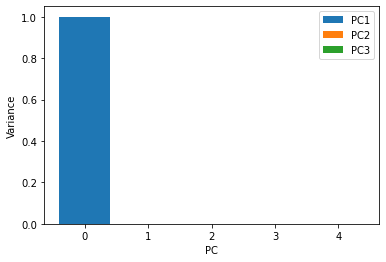

In [13]:
#PCA analysis from BABY PCA STEPS
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

def VCR(data):
    
    data = data.dropna()
    data = data.drop(['Date'], axis = 1)

    d = MinMaxScaler().fit_transform(data)
    pca = decomposition.PCA(n_components=3)
    res = pca.fit_transform(data)
    r = pca.explained_variance_ratio_

#plot PC vs. Variance
    bar1 = plt.bar(0,r[0])
    bar2 = plt.bar(2,r[1])
    bar3 = plt.bar(4,r[2])
    plt.legend( (bar1,bar2,bar3), ('PC1', 'PC2', 'PC3') )
    plt.xlabel('PC')
    plt.ylabel('Variance')
    plt.show()
    
VCR(AAPL_df)

Index(['Date', 'marketChangeOverTime', 'marketClose', 'marketHigh',
       'marketNumberOfTrades'],
      dtype='object')


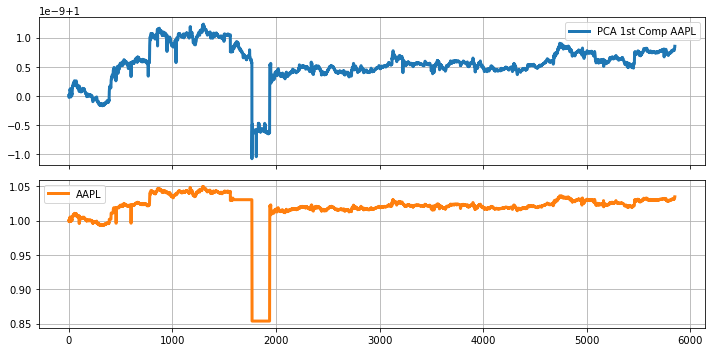

In [10]:
from sklearn.decomposition import PCA

def plot(data):
    
    p = data.iloc[:, [1,3,4,5,8]]
    print(p.columns)
    
    data = data.dropna()
    data = data.drop(['Date'], axis = 1)
    
    prices = data.iloc[:, [1,3,4,5,8]]
    rs = prices.apply(np.log).diff(1)
    
    pca = PCA(1).fit(data.fillna(0))
    pc1 = pd.Series(index=data.columns, data=pca.components_[0])
    
    weights = abs(pc1)/sum(abs(pc1))
    myrs = (weights*rs).sum(1)
    #myrs.cumsum().apply(np.exp).plot()
    
    prices = data['marketClose'] 
    
    rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
    rs_df.columns = ["PCA 1st Comp AAPL", "AAPL"]

    rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,5), grid=True, linewidth=3);
    plt.tight_layout()

    
plot(AAPL_df)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doPCA(data):

  norm = StandardScaler().fit_transform(data)
  pca = PCA()
  newdata = pca.fit_transform(norm)
  return newdata,pca


In [38]:
def DD(data):
    
    #data = data.drop(['Date'], axis = 1)
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')
        #plt.text(n[i,0],n[i,1],data.index[i])

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , PC_df.index[k] , c= 'b')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'r')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
DD(GOOG_df)

ValueError: could not convert string to float: '2021-02-01'

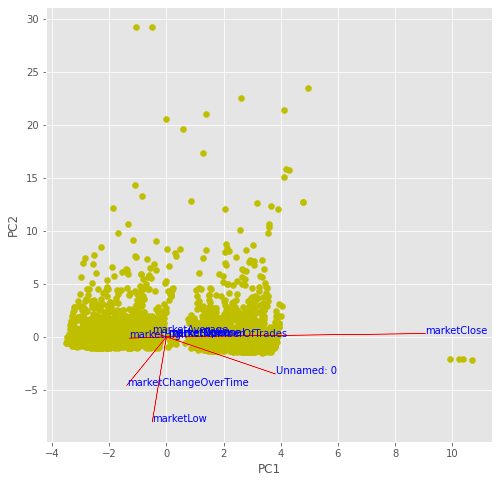

In [30]:
DD(AEO_df)

In [36]:
DD(GOOG_df)

ValueError: could not convert string to float: '2021-02-01'

In [27]:
def imp(data) :
    #data = data.drop(['Date'], axis = 1)
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    PC_dim = PC_df
    
    weight = pca.explained_variance_ratio_
    print(weight)
    
    PC_dim["Feature Importance "] = (PC_dim**2).apply(lambda x : np.sqrt(x.dot(weight)), axis = 1 )
    
    return PC_dim
    
PC_dim = imp(GOOG_df)
PC_dim

[0.36268628 0.158218   0.12524056 0.10807127 0.09880775 0.07518532
 0.04863692 0.01471151 0.00636225 0.00208015]


,0,1,2,3,4,5,6,7,8,9,Feature Importance
Option_type,-0.002937,0.483095,0.469360,0.466214,0.331325,0.341019,0.019587,-0.005729,0.260065,-0.186643,0.328817
Ask,0.065834,0.236251,0.261356,0.218551,-0.516519,-0.548543,0.081668,-0.084225,0.329935,0.365333,0.272952
Bid,-0.055782,-0.003786,-0.090959,0.011206,0.213880,0.192760,0.788478,-0.089222,-0.061760,0.521633,0.201094
Option_price,-0.884346,0.011439,0.023201,0.029372,-0.238867,0.022134,0.148976,0.328685,0.025515,-0.167256,0.540585
Stock_price,0.323194,0.038637,0.040207,0.032588,0.036706,-0.054361,0.055944,0.930260,-0.078308,0.111471,0.227467
Strike_price,-0.128005,0.211208,0.236316,0.171462,-0.053581,0.010530,-0.264000,-0.070552,-0.815237,0.333907,0.177165
Volatility,0.232206,0.040835,0.049139,0.165240,-0.239026,-0.202626,0.513750,-0.079980,-0.382288,-0.632474,0.215635
Volume,0.003298,-0.349181,-0.434595,0.816446,-0.059576,0.062049,-0.102687,0.009461,0.018541,0.065026,0.340813
Time_to_maturity,-0.188788,-0.042292,-0.007380,0.087016,0.675008,-0.703537,0.004030,-0.000649,-0.040941,-0.051488,0.310300
Implied_volatility,-0.008166,0.734285,-0.673631,-0.044404,-0.009653,-0.047136,-0.041595,0.005542,-0.011637,-0.028233,0.377676
